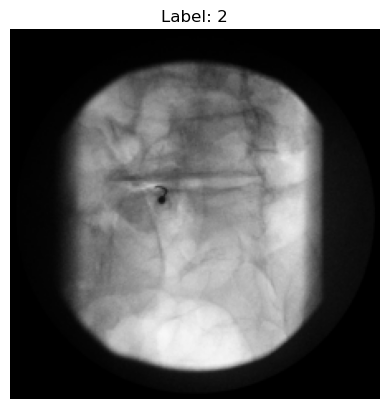

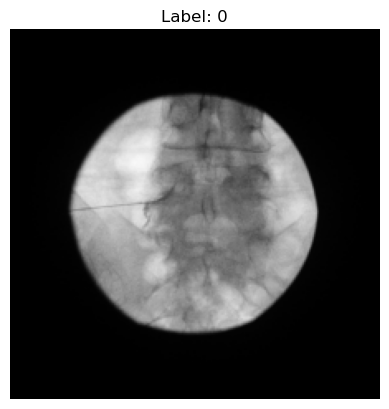

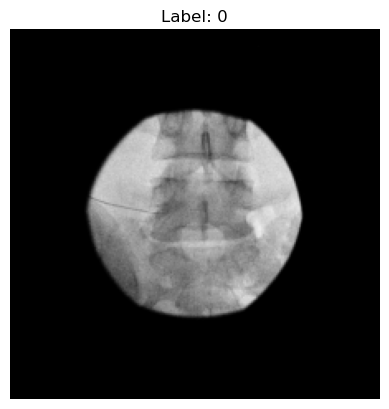

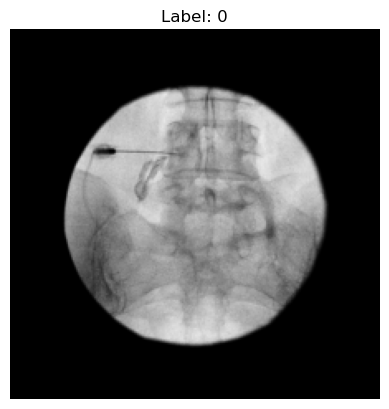

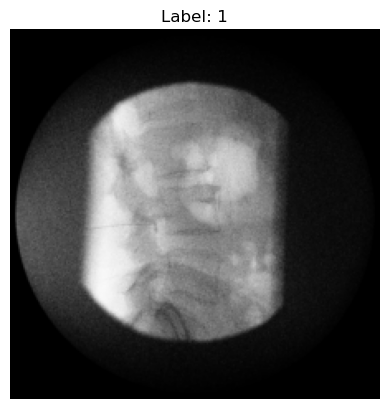

In [4]:
import torch
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms, datasets
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

# Define paths to your data directories
train_dir = '/home/jpatel6/splits_data/train'
test_dir = '/home/jpatel6/splits_data/test'
val_dir = '/home/jpatel6/splits_data/validate'

# Define a custom dataset class
class CustomDataset(Dataset):
    def __init__(self, data_dir, transform=None):
        self.data_dir = data_dir
        self.transform = transform
        self.dataset = datasets.ImageFolder(self.data_dir, transform=self.transform)

    def __len__(self):
        return len(self.dataset)

    def __getitem__(self, idx):
        image, label = self.dataset[idx]
        return image, label
    
    def visualize_image(self, idx):
        image, label = self.dataset[idx]
        plt.imshow(image.permute(1,2,0))
        plt.title(f'Label: {label}')
        plt.axis('off')
        plt.show()

    
# Define transformations (you can add more as needed)
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
])

# Create datasets and dataloaders
train_dataset = CustomDataset(train_dir, transform=transform)
test_dataset = CustomDataset(test_dir, transform=transform)
val_dataset = CustomDataset(val_dir, transform=transform)

# Create dataloaders
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)

def visualize_dataset(dataset, num_images=5):
    for _ in range(num_images):
        idx = random.randint(0, len(dataset) - 1)
        dataset.visualize_image(idx)

# Visualize images from the training dataset
visualize_dataset(train_dataset, num_images=5)